<FONT FACE="cambria" SIZE=9 COLOR="blue">
TalentPitch Challenge
</FONT> 
<br>
<br>
<FONT FACE="cambria" SIZE=4 COLOR="red">
Resuelto por: Juan Pablo Torres Muñoz.
</FONT> 

<FONT FACE="cambria" SIZE=6 COLOR="blue">
    Limpieza de datos
<FONT

**Nota:** Se hace una limpieza de datos inicial, si se descubre en medio del análisis que hay más datos que deben ser arreglados, se arreglan en ese punto.

<FONT FACE="cambria" SIZE=5 COLOR="blue">
Librerías
  <FONT

Las librerías que se utilizarán en la solución del taller son las siguientes:

In [1]:
import numpy as np
import pandas as pd
import pandasql as ps
import math
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date
from datetime import timedelta
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

<FONT FACE="cambria" SIZE=5 COLOR="blue">
 Carga de datos
 <FONT

Se cargan los datos y se hace una revisión inicial de la calidad de los datos y las variables.

In [2]:
df1=pd.read_csv('users.csv')
df2=pd.read_csv('users_raw.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16189 entries, 0 to 16188
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    16189 non-null  float64
 1   desired_state              16189 non-null  object 
 2   last_role                  16168 non-null  object 
 3   dreamt_companies           16189 non-null  object 
 4   forms_to_work              16189 non-null  object 
 5   benefits_sought            16189 non-null  object 
 6   my_languages               16189 non-null  object 
 7   last_study                 16189 non-null  object 
 8   level_last_study           16072 non-null  object 
 9   interested_areas           16189 non-null  object 
 10  knowledges                 16189 non-null  object 
 11  skills                     16189 non-null  object 
 12  softwares_or_programs      16189 non-null  object 
 13  methodologies              16189 non-null  obj

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16189 entries, 0 to 16188
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 16189 non-null  int64  
 1   created_at         16188 non-null  object 
 2   birthdate          15783 non-null  object 
 3   gender             15548 non-null  object 
 4   city               15878 non-null  object 
 5   state              15852 non-null  object 
 6   profile_completed  16189 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 885.5+ KB


In [5]:
df1.head()

,user_id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,knowledges,skills,softwares_or_programs,methodologies,roles,received_messages,sent_messages,num_resumes_created,events_scheduled,views_to_resume_received,views_to_profile_received,saved_from_playlist,reactions_received,average_feedback,selector_appearances,reactiones_made,match_with_playlists,contents_viewed,connections_sent
0,1.0,freelancer,CTO,['https://www.apple.com/'],"['virtual', 'mixed', 'in_house']","['bonuses', 'flexible_schedules', 'personal_recognition']","[['ES', 'advanced'], ['EN', 'advanced', None]]",Ingeniería de Sistemas,other,"['Calidad de Software', 'Formación', 'Tecnología']","['Apologética', 'Laravel', 'Desarrollo Web']","['Encontrar errores', 'Enseñar']","['Power Shell', 'Vscode', 'Slack', 'Git', 'Jira']",['Agile'],[],NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.75,NaN,NaN,NaN,NaN,2.0
1,9670.0,entrepreneur,Líder en gestión de procesos,"['https://www.rutanmedellin.org/es/', 'http://www.andi.com.co/', 'https://www.mattelsa.net/']","['in_house', 'mixed']","['bonuses', 'study_opportunities', 'scholarships', 'flexible_schedules', 'home_office', 'personal_recognition', 'laboral_training', 'distraction_spaces', 'parties_for_employees']",[],Tecnología en sistemas electromecánicos,other,"['Física', 'Diseño', 'Ecología', 'Tecnología', 'Innovación', 'Liderazgo Social']","['Innovación', 'Física', 'Contabilidad', 'Liderazgo Social', 'Diseño de Instalaciones', 'Eficiencia energética']",[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23825.0,employment,Líder de proyectos Masivos,"['https://www.medtronic.com/co-es/index.html', 'http://www.bostonscientific.com/en-US/Home.html', 'https://www.jnjcolombia.com/']","['virtual', 'in_house', 'mixed']","['flexible_schedules', 'study_opportunities', 'scholarships', 'home_office']",[],Bioingeniería,NaN,"['Starups', 'Marketing Digital Móvil', 'Programación neurolingüística', 'Estudio de mercados', 'Inteligencia Artificial', 'Investigación']","['Procesos', 'Biotecnología', 'Marketing Digital', 'Ingeniería', 'Biomateriales', 'Nanotecnología']","['Docencia', 'Desarrollo de proyectos', 'Búsqueda de información', 'Inspirar a los otros', 'Enfoque', 'comunicación asertiva']",[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2245.0,employment,Lider de desarollo,"[None, None, None]",[],[],"[[None, None, None]]",Ingeniería de Sistemas,other,"['Desarrollo de software', 'asf;aslkf;aslkfa;sldfk']",['Desarollo de software'],[],[],[],[],NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,24328.0,freelancer,Diseñadora Gráfica Freelancer,"['https://www.kalley.com.co/', 'https://www.mattelsa.net/', 'https://www.hatsu.co/es/']",['virtual'],"['study_opportunities', 'flexible_schedules', 'home_office', 'laboral_training']","[[None, None, None]]",Gestión Del Diseño Gráfico,other,"['Diseño gráfico', 'Mercadeo', 'marketing digital', 'imagen corporativa', 'marketing de experiencias', 'identidad visual']","['Contenidos digitales', 'Imagen corporativa', 'Identidad Visual']","['Organizar', 'Planear', 'Tener el control del tiempo']","['Illustrator', 'Photoshop', 'InDesign']",[],['Diseñadora Gráfica'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0


In [6]:
df2.head()

,id,created_at,birthdate,gender,city,state,profile_completed
0,1,2016-01-07 18:10:23,1978-11-13,M,Bogotá,Cundinamarca,96.0
1,12,2016-01-07 18:10:23,1980-11-25,M,Medellín,Antioquia,100.0
2,112,2016-01-18 17:28:56,1995-07-17,F,Envigado,Antioquia,84.0
3,121,2016-01-18 17:28:57,1996-06-01,M,Medellín,Antioquia,100.0
4,169,2016-01-18 17:29:03,1985-12-19,M,Medellin,Antioquia,90.0


Se encuentra que los datos tienen problemas de datos faltantes, textos no unificados y tipos de columnas erróneos.

<FONT FACE="cambria" SIZE=5 COLOR="blue">
Corrección texto
<FONT

Al analizar los datos se decide corregir las columnas con texto simple. Las que poseen texto complejo ([...,...,...]) se arreglarán posteriormente si y solo si son utilizadas.

In [7]:
df1["desired_state2"] = (df1["desired_state"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","", regex=True)
                            .str.replace("á","a")
                            .str.replace("é","e")
                            .str.replace("í","i")
                            .str.replace("ó","o")
                            .str.replace("ú","u")                            
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title()
                           ) 
df1["desired_state"] = df1["desired_state2"]
df1 = df1.drop(columns="desired_state2")
df1["last_role2"] = (df1["last_role"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","", regex=True)
                            .str.replace("á","a")
                            .str.replace("é","e")
                            .str.replace("í","i")
                            .str.replace("ó","o")
                            .str.replace("ú","u")                            
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title()
                           ) 
df1["last_role"] = df1["last_role2"]
df1 = df1.drop(columns="last_role2")
df1["last_study2"] = (df1["last_study"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","", regex=True)
                            .str.replace("á","a")
                            .str.replace("é","e")
                            .str.replace("í","i")
                            .str.replace("ó","o")
                            .str.replace("ú","u")                            
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title()
                           ) 
df1["last_study"] = df1["last_study2"]
df1 = df1.drop(columns="last_study2")
df1.head(5)

,user_id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,knowledges,skills,softwares_or_programs,methodologies,roles,received_messages,sent_messages,num_resumes_created,events_scheduled,views_to_resume_received,views_to_profile_received,saved_from_playlist,reactions_received,average_feedback,selector_appearances,reactiones_made,match_with_playlists,contents_viewed,connections_sent
0,1.0,Freelancer,Cto,['https://www.apple.com/'],"['virtual', 'mixed', 'in_house']","['bonuses', 'flexible_schedules', 'personal_recognition']","[['ES', 'advanced'], ['EN', 'advanced', None]]",Ingenieria De Sistemas,other,"['Calidad de Software', 'Formación', 'Tecnología']","['Apologética', 'Laravel', 'Desarrollo Web']","['Encontrar errores', 'Enseñar']","['Power Shell', 'Vscode', 'Slack', 'Git', 'Jira']",['Agile'],[],NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.75,NaN,NaN,NaN,NaN,2.0
1,9670.0,Entrepreneur,Lider En Gestion De Procesos,"['https://www.rutanmedellin.org/es/', 'http://www.andi.com.co/', 'https://www.mattelsa.net/']","['in_house', 'mixed']","['bonuses', 'study_opportunities', 'scholarships', 'flexible_schedules', 'home_office', 'personal_recognition', 'laboral_training', 'distraction_spaces', 'parties_for_employees']",[],Tecnologia En Sistemas Electromecanicos,other,"['Física', 'Diseño', 'Ecología', 'Tecnología', 'Innovación', 'Liderazgo Social']","['Innovación', 'Física', 'Contabilidad', 'Liderazgo Social', 'Diseño de Instalaciones', 'Eficiencia energética']",[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23825.0,Employment,Lider De Proyectos Masivos,"['https://www.medtronic.com/co-es/index.html', 'http://www.bostonscientific.com/en-US/Home.html', 'https://www.jnjcolombia.com/']","['virtual', 'in_house', 'mixed']","['flexible_schedules', 'study_opportunities', 'scholarships', 'home_office']",[],Bioingenieria,NaN,"['Starups', 'Marketing Digital Móvil', 'Programación neurolingüística', 'Estudio de mercados', 'Inteligencia Artificial', 'Investigación']","['Procesos', 'Biotecnología', 'Marketing Digital', 'Ingeniería', 'Biomateriales', 'Nanotecnología']","['Docencia', 'Desarrollo de proyectos', 'Búsqueda de información', 'Inspirar a los otros', 'Enfoque', 'comunicación asertiva']",[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2245.0,Employment,Lider De Desarollo,"[None, None, None]",[],[],"[[None, None, None]]",Ingenieria De Sistemas,other,"['Desarrollo de software', 'asf;aslkf;aslkfa;sldfk']",['Desarollo de software'],[],[],[],[],NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,24328.0,Freelancer,Diseñadora Grafica Freelancer,"['https://www.kalley.com.co/', 'https://www.mattelsa.net/', 'https://www.hatsu.co/es/']",['virtual'],"['study_opportunities', 'flexible_schedules', 'home_office', 'laboral_training']","[[None, None, None]]",Gestion Del Diseño Grafico,other,"['Diseño gráfico', 'Mercadeo', 'marketing digital', 'imagen corporativa', 'marketing de experiencias', 'identidad visual']","['Contenidos digitales', 'Imagen corporativa', 'Identidad Visual']","['Organizar', 'Planear', 'Tener el control del tiempo']","['Illustrator', 'Photoshop', 'InDesign']",[],['Diseñadora Gráfica'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0


In [8]:
df2["city2"] = (df2["city"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","", regex=True)
                            .str.replace("á","a")
                            .str.replace("é","e")
                            .str.replace("í","i")
                            .str.replace("ó","o")
                            .str.replace("ú","u")                            
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title()
                           ) 
df2["city"] = df2["city2"]
df2 = df2.drop(columns="city2")
df2["state2"] = (df2["state"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","", regex=True)
                            .str.replace("á","a")
                            .str.replace("é","e")
                            .str.replace("í","i")
                            .str.replace("ó","o")
                            .str.replace("ú","u")                            
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title()
                           ) 
df2["state"] = df2["state2"]
df2 = df2.drop(columns="state2")
df2.head(5)

,id,created_at,birthdate,gender,city,state,profile_completed
0,1,2016-01-07 18:10:23,1978-11-13,M,Bogota,Cundinamarca,96.0
1,12,2016-01-07 18:10:23,1980-11-25,M,Medellin,Antioquia,100.0
2,112,2016-01-18 17:28:56,1995-07-17,F,Envigado,Antioquia,84.0
3,121,2016-01-18 17:28:57,1996-06-01,M,Medellin,Antioquia,100.0
4,169,2016-01-18 17:29:03,1985-12-19,M,Medellin,Antioquia,90.0


Se realizó la unificación del texto retirando caracteres especiales, posibles dobles espacios en blanco, espacios al principio o final de una palabra, retirando tildes y haciendo que cada palabra solo tenga la primer letra en mayúscula.

<FONT FACE="cambria" SIZE=5 COLOR="blue">
Corrección tipo de columnas
    <FONT

Se procede a cambiar el tipo de columna de "user_id" de float64 a int64 para hacer la correcta unión con la otra base de datos.

In [9]:
df1['user_id']=df1['user_id'].apply(np.int64)
df1.dtypes

user_id                        int64
desired_state                 object
last_role                     object
dreamt_companies              object
forms_to_work                 object
benefits_sought               object
my_languages                  object
last_study                    object
level_last_study              object
interested_areas              object
knowledges                    object
skills                        object
softwares_or_programs         object
methodologies                 object
roles                         object
received_messages            float64
sent_messages                float64
num_resumes_created          float64
events_scheduled             float64
views_to_resume_received     float64
views_to_profile_received    float64
saved_from_playlist          float64
reactions_received           float64
average_feedback             float64
selector_appearances         float64
reactiones_made              float64
match_with_playlists         float64
c

Se convierten las columnas con fechas a tipo datetime64 para un correcto manejo de la información

In [10]:
df2['created_at'] = pd.to_datetime(df2.created_at, format='%Y-%m-%d %H:%M:%S')
df2['birthdate'] = pd.to_datetime(df2.birthdate, format='%Y-%m-%d')

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16189 entries, 0 to 16188
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 16189 non-null  int64         
 1   created_at         16188 non-null  datetime64[ns]
 2   birthdate          15783 non-null  datetime64[ns]
 3   gender             15548 non-null  object        
 4   city               15878 non-null  object        
 5   state              15852 non-null  object        
 6   profile_completed  16189 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 885.5+ KB


<FONT FACE="cambria" SIZE=5 COLOR="blue">
Datos faltantes
    <FONT

<FONT FACE="cambria" SIZE=4 COLOR="blue">
    Arreglo inicial
    <FONT

Se encuentra que las columnas con "[]" no son contadas como NaN por lo que se procede a arreglar.

In [12]:
df1["dreamt_companies"]=df1["dreamt_companies"].mask(df1["dreamt_companies"] == "[]")
df1["forms_to_work"]=df1["forms_to_work"].mask(df1["forms_to_work"] == "[]")
df1["benefits_sought"]=df1["benefits_sought"].mask(df1["benefits_sought"] == "[]")
df1["my_languages"]=df1["my_languages"].mask(df1["my_languages"] == "[]")
df1["interested_areas"]=df1["interested_areas"].mask(df1["interested_areas"] == "[]")
df1["knowledges"]=df1["knowledges"].mask(df1["knowledges"] == "[]")
df1["skills"]=df1["skills"].mask(df1["skills"] == "[]")
df1["softwares_or_programs"]=df1["softwares_or_programs"].mask(df1["softwares_or_programs"] == "[]")
df1["methodologies"]=df1["methodologies"].mask(df1["methodologies"] == "[]")
df1["roles"]=df1["roles"].mask(df1["roles"] == "[]")

Se crea una función que informa el número y porcentaje de datos faltantes por columna.

In [13]:
def missings(x):
            a = sum(x.isna())
            b = 100*np.mean(x.isna())
            c = pd.Series({"Datos Faltantes": a,"%Datos Faltantes": b})
            return(c)

<FONT FACE="cambria" SIZE=4 COLOR="blue">
    Tabla datos faltantes datos users
    <FONT

In [14]:
df1.apply(missings,axis=0)

,user_id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,knowledges,skills,softwares_or_programs,methodologies,roles,received_messages,sent_messages,num_resumes_created,events_scheduled,views_to_resume_received,views_to_profile_received,saved_from_playlist,reactions_received,average_feedback,selector_appearances,reactiones_made,match_with_playlists,contents_viewed,connections_sent
Datos Faltantes,0.0,0.0,21.000000,6621.000000,4998.000000,5422.000000,1094.000000,0.0,117.000000,3067.000000,4932.000000,4976.00000,5177.000000,6302.000000,13628.000000,15940.000000,16149.000000,15812.000000,16153.000000,15921.000000,15446.000000,15894.000000,16084.000000,16112.000000,15207.000000,16122.000000,16164.000000,16109.000000,15728.000000
%Datos Faltantes,0.0,0.0,0.129718,40.898141,30.872815,33.491877,6.757675,0.0,0.722713,18.944963,30.465131,30.73692,31.978504,38.927667,84.180616,98.461919,99.752919,97.671258,99.777627,98.344555,95.410464,98.177775,99.351411,99.524368,93.934153,99.586139,99.845574,99.505837,97.152387


<FONT FACE="cambria" SIZE=4 COLOR="blue">
    Tabla datos faltantes datos users_raw
    <FONT

In [15]:
df2.apply(missings,axis=0)

,id,created_at,birthdate,gender,city,state,profile_completed
Datos Faltantes,0.0,1.000000,406.000000,641.000000,311.000000,337.00000,0.0
%Datos Faltantes,0.0,0.006177,2.507876,3.959479,1.921058,2.08166,0.0


<FONT FACE="cambria" SIZE=4 COLOR="blue">
    Gráficos recomendados en el cuestionario (se considera más informativa la tabla realizada anteriormente)
    <FONT

<AxesSubplot:>

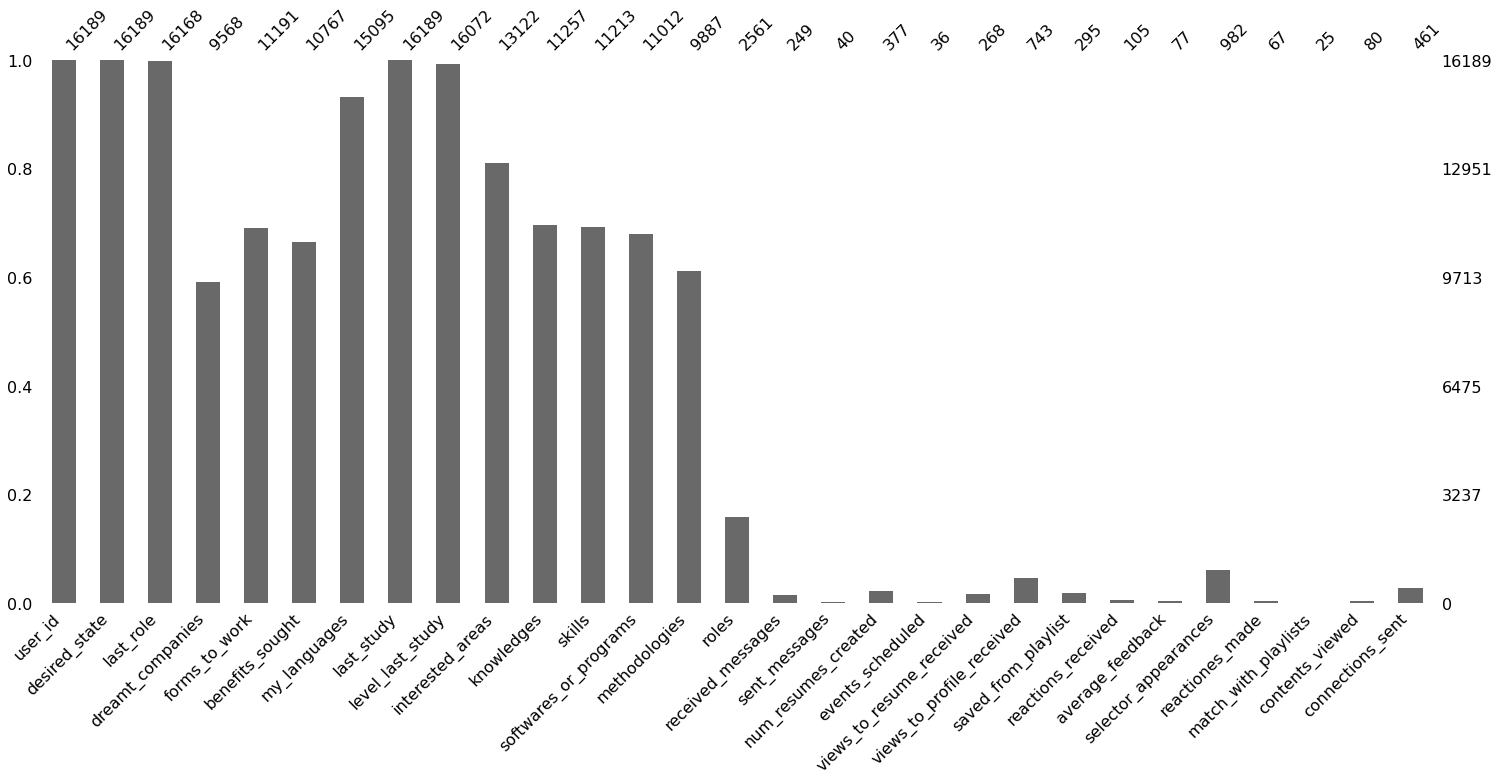

In [16]:
msno.bar(df1) #Gráfico recomendado en el cuestionario (se considera mejor la tabla realizada anteriormente)

<AxesSubplot:>

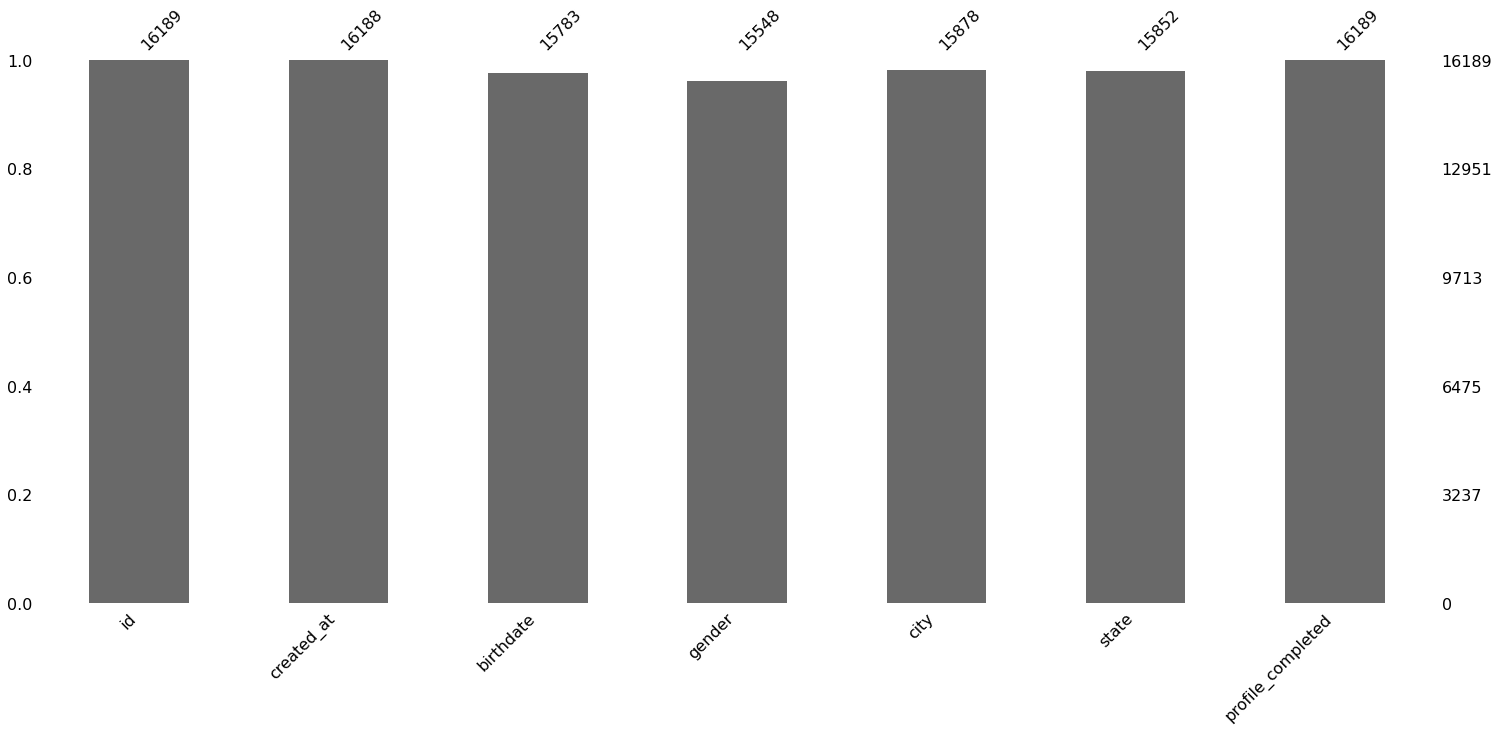

In [17]:
msno.bar(df2) #Gráfico recomendado en el cuestionario (se considera mejor la tabla realizada anteriormente)

<FONT FACE="cambria" SIZE=6 COLOR="blue"> 
    Análisis descriptivo y exploratorio
    <FONT

- Profile completion rate over time.
- Top 5 roles with the highest average_feedback by gender.
- Average views_to_resume_received by city.
- Top 5 dreamt_companies by desired_state and level_last_study for users with more than 10 connections_sent.
- Top 3 most common skills for users with average_feedback greater than 4, grouped by last_study.

<FONT FACE="cambria" SIZE=5 COLOR="red"> 
    1. Profile completion rate over time.
    <FONT

Creamos una nueva columna que nos indica si el perfil está completo o no:

In [18]:
def completo(x): 
    if x==100 : return(1)
    else: return(0)
df2["Completo"] = df2["profile_completed"].apply(completo)

In [19]:
df2.head()

,id,created_at,birthdate,gender,city,state,profile_completed,Completo
0,1,2016-01-07 18:10:23,1978-11-13,M,Bogota,Cundinamarca,96.0,0
1,12,2016-01-07 18:10:23,1980-11-25,M,Medellin,Antioquia,100.0,1
2,112,2016-01-18 17:28:56,1995-07-17,F,Envigado,Antioquia,84.0,0
3,121,2016-01-18 17:28:57,1996-06-01,M,Medellin,Antioquia,100.0,1
4,169,2016-01-18 17:29:03,1985-12-19,M,Medellin,Antioquia,90.0,0


Agrupamos por año y mes calculando la proporción de perfiles completos.

<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Tabla porcentaje de completitud de perfil por año
    <FONT


In [20]:
tabla1=df2.loc[:,["created_at","Completo"]].groupby((df2.created_at.dt.year)).mean()*100
tabla1=tabla1.rename_axis(['Año'])

In [21]:
tabla1

,Completo
Año,
2016.0,21.951220
2017.0,13.888889
2018.0,18.518519
2019.0,20.816327
2020.0,43.976300
2021.0,18.109966
2022.0,4.839897
2023.0,1.550388


<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Tabla porcentaje de completitud de perfil por mes
    <FONT


In [22]:
tabla2=df2.loc[:,["created_at","Completo"]].groupby([(df2.created_at.dt.year), (df2.created_at.dt.month)]).mean()*100
tabla2=tabla2.rename_axis(['Año','Mes'])

In [23]:
tabla2

Completo
Año    Mes             
2016.0 1.0    40.000000
       2.0     0.000000
       5.0     0.000000
       6.0     0.000000
       7.0    37.500000
       8.0    30.769231
       9.0     0.000000
2017.0 2.0     0.000000
       3.0     0.000000
       5.0   100.000000
       6.0     0.000000
       7.0     0.000000
       8.0    23.076923
       9.0     0.000000
       11.0    0.000000
2018.0 1.0   100.000000
       2.0    10.000000
       3.0    25.000000
       4.0     0.000000
       6.0   100.000000
       7.0     0.000000
       8.0    14.285714
       9.0     0.000000
       10.0   14.285714
       11.0    0.000000
       12.0  100.000000
2019.0 1.0     0.000000
       3.0    50.000000
       4.0     0.000000
       6.0    45.454545
       7.0    20.000000
       8.0    29.411765
       9.0    14.285714
       10.0    4.761905
       11.0   25.000000
       12.0   12.500000
2020.0 1.0     0.000000
       2.0     9.523810
       3.0    16.814159
       4.0    19.753086
       5.0    22.535211
       6.0    28.571429
       7.0    28.947368
       8.0    18.181818
       9.0    58.571429
       10.0   56.626506
       11.0   49.909584
       12.0   52.439024
2021.0 1.0    40.625000
       2.0    59.090909
       3.0    51.778656
       4.0    55.254237
       5.0    17.021277
       6.0    24.148607
       7.0    17.874396
       8.0    16.225547
       9.0    12.066246
       10.0   10.212998
       11.0   11.487759
       12.0    6.055046
2022.0 1.0     6.716418
       2.0     4.380104
       3.0     4.452467
       4.0     4.109589
       5.0     6.007067
       6.0     4.356061
       7.0     5.900621
       8.0     3.676471
       9.0     8.130081
       10.0    3.921569
       11.0    2.917772
       12.0    6.557377
2023.0 1.0     1.923077
       2.0     0.000000
       3.0     2.777778
       4.0     0.000000

<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Tabla porcentaje de completitud de perfil por día
    <FONT

In [24]:
tabla3=df2.loc[:,["created_at","Completo"]].groupby([(df2.created_at.dt.year), (df2.created_at.dt.month) , (df2.created_at.dt.day)]).mean()*100
tabla3=tabla3.rename_axis(['Año','Mes','Día'])

In [25]:
tabla3

Completo
Año    Mes  Día             
2016.0 1.0  7.0    50.000000
            18.0   33.333333
       2.0  1.0     0.000000
            4.0     0.000000
            5.0     0.000000
            8.0     0.000000
            10.0    0.000000
            19.0    0.000000
            20.0    0.000000
            21.0    0.000000
       5.0  24.0    0.000000
       6.0  10.0    0.000000
            17.0    0.000000
       7.0  15.0    0.000000
            25.0   50.000000
            26.0  100.000000
            27.0    0.000000
            28.0    0.000000
       8.0  7.0     0.000000
            8.0     0.000000
            9.0    50.000000
            10.0  100.000000
            11.0    0.000000
            16.0  100.000000
            17.0    0.000000
            22.0    0.000000
            23.0    0.000000
            29.0  100.000000
            30.0    0.000000
       9.0  6.0     0.000000
2017.0 2.0  1.0     0.000000
            2.0     0.000000
            6.0     0.000000
            7.0     0.000000
            13.0    0.000000
            15.0    0.000000
            17.0    0.000000
            18.0    0.000000
       3.0  9.0     0.000000
            21.0    0.000000
            26.0    0.000000
       5.0  10.0  100.000000
            24.0  100.000000
       6.0  6.0     0.000000
       7.0  4.0     0.000000
            17.0    0.000000
            26.0    0.000000
            28.0    0.000000
       8.0  1.0     0.000000
            8.0     0.000000
            10.0  100.000000
            11.0    0.000000
            14.0    0.000000
            16.0    0.000000
            17.0   50.000000
            22.0    0.000000
            24.0    0.000000
       9.0  2.0     0.000000
            23.0    0.000000
            24.0    0.000000
       11.0 29.0    0.000000
2018.0 1.0  31.0  100.000000
       2.0  12.0   50.000000
            13.0    0.000000
            14.0    0.000000
            15.0    0.000000
            20.0    0.000000
            21.0    0.000000
            23.0    0.000000
       3.0  2.0   100.000000
            13.0    0.000000
            20.0    0.000000
            28.0    0.000000
       4.0  17.0    0.000000
            26.0    0.000000
       6.0  25.0  100.000000
       7.0  17.0    0.000000
            25.0    0.000000
       8.0  8.0    33.333333
            9.0     0.000000
            11.0    0.000000
            12.0    0.000000
            13.0    0.000000
            15.0    0.000000
            17.0   50.000000
            21.0    0.000000
            27.0    0.000000
       9.0  12.0    0.000000
            24.0    0.000000
       10.0 8.0    14.285714
            11.0   25.000000
            18.0    0.000000
            28.0    0.000000
       11.0 9.0     0.000000
            13.0    0.000000
       12.0 3.0   100.000000
            11.0  100.000000
2019.0 1.0  22.0    0.000000
       3.0  15.0    0.000000
            18.0  100.000000
       4.0  2.0     0.000000
            10.0    0.000000
       6.0  11.0    0.000000
            13.0  100.000000
            16.0    0.000000
            18.0    0.000000
            21.0    0.000000
            27.0   50.000000
            28.0  100.000000
       7.0  1.0    33.333333
            2.0    25.000000
            3.0     8.333333
            4.0    12.500000
            5.0    20.000000
            8.0    50.000000
            9.0     0.000000
            10.0    0.000000
            11.0   16.666667
            12.0   40.000000
            13.0   25.000000
            14.0   20.000000
            15.0   11.111111
            16.0   12.500000
            17.0   40.000000
            18.0   50.000000
            19.0    0.000000
            20.0    0.000000
            21.0   50.000000
            22.0    0.000000
            23.0   25.000000
            24.0    0.000000
            25.0   25.000000
            26.0   20.000000
            27.0    0.000000
            28.0   33.333333
            29.0   40.000000
            30.0  

<FONT FACE="cambria" SIZE=5 COLOR="red"> 
    2. Top 5 roles with the highest average_feedback by gender.
    <FONT

Unificamos las tablas haciendo un left join:

In [26]:
df3=ps.sqldf("""select * from df1 left join df2 on (df1.user_id=df2.id)""")
df3 = df3.drop(columns="id")

obteniendo la siguiente tabla:

In [27]:
df3.head(2)

,user_id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,knowledges,skills,softwares_or_programs,methodologies,roles,received_messages,sent_messages,num_resumes_created,events_scheduled,views_to_resume_received,views_to_profile_received,saved_from_playlist,reactions_received,average_feedback,selector_appearances,reactiones_made,match_with_playlists,contents_viewed,connections_sent,created_at,birthdate,gender,city,state,profile_completed,Completo
0,1,Freelancer,Cto,['https://www.apple.com/'],"['virtual', 'mixed', 'in_house']","['bonuses', 'flexible_schedules', 'personal_recognition']","[['ES', 'advanced'], ['EN', 'advanced', None]]",Ingenieria De Sistemas,other,"['Calidad de Software', 'Formación', 'Tecnología']","['Apologética', 'Laravel', 'Desarrollo Web']","['Encontrar errores', 'Enseñar']","['Power Shell', 'Vscode', 'Slack', 'Git', 'Jira']",['Agile'],None,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.75,NaN,NaN,NaN,NaN,2.0,2016-01-07 18:10:23.000000,1978-11-13 00:00:00.000000,M,Bogota,Cundinamarca,96.0,0
1,9670,Entrepreneur,Lider En Gestion De Procesos,"['https://www.rutanmedellin.org/es/', 'http://www.andi.com.co/', 'https://www.mattelsa.net/']","['in_house', 'mixed']","['bonuses', 'study_opportunities', 'scholarships', 'flexible_schedules', 'home_office', 'personal_recognition', 'laboral_training', 'distraction_spaces', 'parties_for_employees']",None,Tecnologia En Sistemas Electromecanicos,other,"['Física', 'Diseño', 'Ecología', 'Tecnología', 'Innovación', 'Liderazgo Social']","['Innovación', 'Física', 'Contabilidad', 'Liderazgo Social', 'Diseño de Instalaciones', 'Eficiencia energética']",None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-08 10:04:57.000000,1998-02-17 00:00:00.000000,F,Medellin,Antioquia,66.0,0


Se realiza una limpieza del texto dejando a su vez las comas ya que nos sirven como separador.

In [28]:
df3["roles2"] = (df3["roles"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ,]","", regex=True)
                            .str.replace("á","a")
                            .str.replace("é","e")
                            .str.replace("í","i")
                            .str.replace("ó","o")
                            .str.replace("ú","u")                            
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title())
df3["roles"] = df3["roles2"]
df3 = df3.drop(columns="roles2")

Se realiza la separación de los roles para poder estudiarlos

In [29]:
prueba=df3["roles"].str.split(",",expand=True)
prueba.columns=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","aa","ab","ac","ad"]

In [30]:
prueba.head(10)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,ab,ac,ad
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Diseñadora Grafica,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,Director De Contenidos Digitales,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,Diseñador De Metodologias,Lider Identificacion Talento,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [31]:
ps.sqldf("""select ac from prueba where ac not in ('None')""") #demostración que la ultima columna tiene al menos un dato

,ac
0,Vuejs Developer


In [32]:
prueba.insert(0,"average_feedback",df3["average_feedback"])
prueba.insert(0,"gender",df3["gender"])

In [33]:
prueba.head()

,gender,average_feedback,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,ab,ac,ad
0,M,4.75,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,F,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,M,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,M,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,F,NaN,Diseñadora Grafica,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [34]:
prueba2=pd.melt(prueba,id_vars=['gender','average_feedback'],value_vars=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","aa","ab","ac","ad"],value_name="roles")

**Importante:** Al realizar el melt quedan tabulaciones por lo que es necesario realizar una limpieza

In [35]:
prueba2["roles2"] = (prueba2["roles"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ,]","", regex=True)
                            .str.replace("á","a")
                            .str.replace("é","e")
                            .str.replace("í","i")
                            .str.replace("ó","o")
                            .str.replace("ú","u")   
                            .str.replace("\t","")
                            .str.replace("\n","")  
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title())
prueba2["roles"] = prueba2["roles2"]
prueba2 = prueba2.drop(columns="roles2")

tabla con los roles separados respetando el genero y el average_feedback:

In [36]:
ps.sqldf("""select gender,roles, avg(average_feedback) as mediafeed from prueba2 group by gender, roles""")

,gender,roles,mediafeed
0,None,None,4.000000
1,None,Adquirir Las Herramientas Adecuadas Y Oportunas Para Dar Lo Mejor De Mi,NaN
2,None,Analista De Datos,NaN
3,None,Analista De Gestion Ambiental,NaN
4,None,Asesor De Comunicaciones Estrategicas,NaN
5,None,Auditor De Sistemas,NaN
6,None,Ayudante Y Buen Compañero De Equipo,NaN
7,None,Con Datos Puntuales Podemos Saber Las Necesidades Del Usuario Y Prestar El Mejor Servicio,NaN
8,None,Coordinador De Ventas,NaN
9,None,Creador De Aplicaciones Web Que Aporten Soluciones Sencillas A Trabajos Complejos,NaN


Se encuentra que hay 30 generos catalogados como "0", sin embargo, no se cambia a "F" o "M" ya que no se posee la información suficiente para ello (no se sabe si el "0" representa hombres o mujeres)

In [37]:
ps.sqldf("""select gender, count(gender) as conteo from prueba2 group by gender""")

,gender,conteo
0,None,0
1,0,30
2,F,151260
3,M,314610
4,other,540


Es muy importante hacer una unificación del texto, se encontró que habian roles escritos en ingles y español por lo que se pasaron todos a español uniendo así las frecuencias de los mismos.

In [38]:
prueba2["roles"]=prueba2["roles"].str.replace("Developer","Desarrollador")
prueba2["roles"]=prueba2["roles"].str.replace("Data Scientist","Cientifico De Datos")
prueba2["roles"]=prueba2["roles"].str.replace("Data Analyst","Analista De Datos")
prueba2["roles"]=prueba2["roles"].str.replace("Analyst","Analista")

In [39]:
ps.sqldf("""select roles, count(roles) as conteo from prueba2 group by roles order by conteo desc limit 10""")

,roles,conteo
0,Desarrollador Junior,139
1,Desarrollador De Software,92
2,Desarrollador,92
3,Desarrollador Frontend,73
4,Desarrollador Web,72
5,Desarrollador Backend,57
6,Analista De Datos,54
7,Programador Junior,44
8,Desarrollador Full Stack,38
9,Programador,36


In [40]:
final1=ps.sqldf("""select gender,roles, avg(average_feedback) as mediafeed from prueba2 group by gender, roles""")

<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Tabla top 5 roles con average_feedback más alto para mujeres.
    <FONT


In [41]:
ps.sqldf("""select * from final1 where gender in ("F") order by mediafeed desc limit 5""")

,gender,roles,mediafeed
0,F,Diseñadora Ux,5.00
1,F,Mas Prueba,5.00
2,F,Ceo En Una Empresa Legaltech,4.75
3,F,Coordinadorlider De Sistemas De Gestion Integrados,4.75
4,F,Desarrolladora Web Junior,4.67


<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Tabla top 5 roles con average_feedback más alto para hombres.
    <FONT

In [42]:
ps.sqldf("""select * from final1 where gender in ("M") order by mediafeed desc limit 5""")

,gender,roles,mediafeed
0,M,Consultor Bi Dddm Process,5.00
1,M,Consultor Empaques Ecologicos,5.00
2,M,Desarrollador,5.00
3,M,Lider Innovacion Y Transformacion Digital,5.00
4,M,Ceo De La Compañia,4.67


<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Tabla top 5 roles con average_feedback más alto para "otro".
    <FONT

In [43]:
ps.sqldf("""select * from final1 where gender in ("other") order by mediafeed desc limit 5""")

,gender,roles,mediafeed
0,other,None,None
1,other,Desarrollador De Aplicaciones,None
2,other,Operador Financiero,None


<FONT FACE="cambria" SIZE=5 COLOR="red"> 
    3. Average views_to_resume_received by city.
    <FONT


<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Tabla media de vistas al curriculum por ciudad. (con Python)
    <FONT

In [44]:
df3.loc[:,["city","views_to_resume_received"]].groupby("city").mean() #Con python

,views_to_resume_received
city,
,NaN
Abejorral,NaN
Abohar,NaN
Acacias,NaN
Acevedo,NaN
Achi,NaN
Adampur,NaN
Addakhiliyah,NaN
Afton,NaN


<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Tabla media de vistas al curriculum por ciudad. (con SQL)
    <FONT

In [45]:
ps.sqldf("""select city, avg(views_to_resume_received) as media from df3 group by city""") #Con SQL

,city,media
0,None,1.000000
1,,NaN
2,Abejorral,NaN
3,Abohar,NaN
4,Acacias,NaN
5,Acevedo,NaN
6,Achi,NaN
7,Adampur,NaN
8,Addakhiliyah,NaN
9,Afton,NaN


<FONT FACE="cambria" SIZE=5 COLOR="red"> 
    4. Tabla propuesta: ciudades donde los hombres tienen mas de un 50% del perfil completo.
    <FONT

Decidí hacer esta tabla debido a que con las gran mayoría de variables, estadísticamente no es posible dar una conclusión válida. Esto es debido a la gran cantidad de datos faltantes, lo cual implica que el sesgo en los análisis realizados es muy alto. La variable profile_completed, es una de las pocas numéricas que no tiene ese problema.

<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Ciudades donde los hombres tienen mas de un 50% del perfil completo
    <FONT

In [46]:
ps.sqldf("""select city, avg(Completo) as media from df3 where gender in ('M') group by city having avg(completo)>0.5""")

,city,media
0,Aguadas,1.000000
1,Albania,1.000000
2,Algarrobo,1.000000
3,Amalfi,1.000000
4,Carmen De Viboral,0.750000
5,Castilla La Nueva,1.000000
6,Cerrito,1.000000
7,Chigorodo,1.000000
8,Circasia,0.666667
9,Coromoro,1.000000


**Conclusión:** Se encuentra que solamente 33 ciudades poseen perfiles de hombres que de media estan completos en un 50% mínimo.

<FONT FACE="cambria" SIZE=6 COLOR="blue">
    Gráficos
    <FONT

- Stacked bar plot of forms_to_work by level_last_study .
- Heatmap of the most common languages by last_study .
- Scatter plot of age vs. average_feedback .
- Line plot of profile_completed over time (by day, by week, etc.).
- Heatmap of profile_completed by city and state .
- Stacked bar plot of top 5 roles by gender .
- Scatter plot of views_to_resume_received vs. reactions_received, colored by profile_completed .

<FONT FACE="cambria" SIZE=5 COLOR="red"> 
    1. Stacked bar plot of forms_to_work by level_last_study.
    <FONT


Inicialmente miramos los tipos de "level_last_study"

In [47]:
ps.sqldf("""select level_last_study, count(level_last_study) from df3 group by level_last_study""")

,level_last_study,count(level_last_study)
0,None,0
1,bachelor,597
2,doctorate,42
3,finished,8
4,master_degree,790
5,other,2545
6,practice,7
7,specialization,1368
8,stopped,2
9,technical,1416


Hacemos la limpieza de texto de la variable forms_to_work, de igual manera se realiza la desagregacion de los datos "[...,...]" siguiendo el mismo proceso realizado anteriormente.

In [48]:
df3["forms_to_work2"] = (df3["forms_to_work"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ,]","", regex=True)
                            .str.replace("á","a")
                            .str.replace("é","e")
                            .str.replace("í","i")
                            .str.replace("ó","o")
                            .str.replace("ú","u")   
                            .str.replace("\t","")
                            .str.replace("\n","")  
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title())
df3["forms_to_work"] = df3["forms_to_work2"]
df3 = df3.drop(columns="forms_to_work2")
prueba3=df3["forms_to_work"].str.split(",",expand=True)

In [49]:
prueba3.columns=["a","b","c","d","e","f","g"]

In [50]:
prueba3.insert(0,"level_last_study",df3["level_last_study"])

In [51]:
prueba4=pd.melt(prueba3,id_vars=['level_last_study'],value_vars=["a","b","c","d","e","f","g"],value_name="forms_to_work")

**Importante:** Al realizar el melt quedan tabulaciones por lo que es necesario realizar una limpieza

In [52]:
prueba4["forms_to_work2"] = (prueba4["forms_to_work"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ,]","", regex=True)
                            .str.replace("á","a")
                            .str.replace("é","e")
                            .str.replace("í","i")
                            .str.replace("ó","o")
                            .str.replace("ú","u")   
                            .str.replace("\t","")
                            .str.replace("\n","")  
                            .str.replace(" +"," ", regex=True)
                            .str.strip()
                            .str.title())
prueba4["forms_to_work"] = prueba4["forms_to_work2"]
prueba4 = prueba4.drop(columns="forms_to_work2")

In [53]:
ps.sqldf("""select forms_to_work, count(forms_to_work) from prueba4 group by forms_to_work""")

,forms_to_work,count(forms_to_work)
0,None,0
1,Flexible,38
2,Freelancer,1
3,Inhouse,5354
4,Mixed,7262
5,Perhours,16
6,Remote,6
7,Teleworking,33
8,Tobeagreed,2626
9,Virtual,7338


Cruzamos la información para poder realizar el gráfico.

In [54]:
tablacruzada = pd.crosstab(index=prueba4['forms_to_work'],
                        columns=prueba4['level_last_study'],
                             normalize="index")
tablacruzada

level_last_study,bachelor,doctorate,finished,master_degree,other,practice,specialization,stopped,technical,technologist,undergraduate
forms_to_work,,,,,,,,,,,
Flexible,0.026316,0.000000,0.052632,0.078947,0.052632,0.000000,0.078947,0.000000,0.078947,0.078947,0.552632
Freelancer,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Inhouse,0.025188,0.001880,0.000752,0.035714,0.255263,0.000564,0.068421,0.000188,0.091729,0.117105,0.403195
Mixed,0.028290,0.002912,0.000277,0.048676,0.211898,0.000416,0.087505,0.000139,0.087089,0.120094,0.412703
Perhours,0.062500,0.000000,0.125000,0.125000,0.062500,0.000000,0.062500,0.000000,0.000000,0.125000,0.437500
Remote,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Teleworking,0.000000,0.000000,0.000000,0.090909,0.030303,0.000000,0.151515,0.000000,0.030303,0.212121,0.484848
Tobeagreed,0.045193,0.003447,0.000000,0.043661,0.065109,0.000000,0.094217,0.000383,0.109920,0.149751,0.488319
Virtual,0.029755,0.002605,0.000548,0.044700,0.228712,0.000274,0.078157,0.000137,0.088167,0.129028,0.397916


<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Gráfico de formas de trabajo por último nivel de estudio alcanzado.
    <FONT

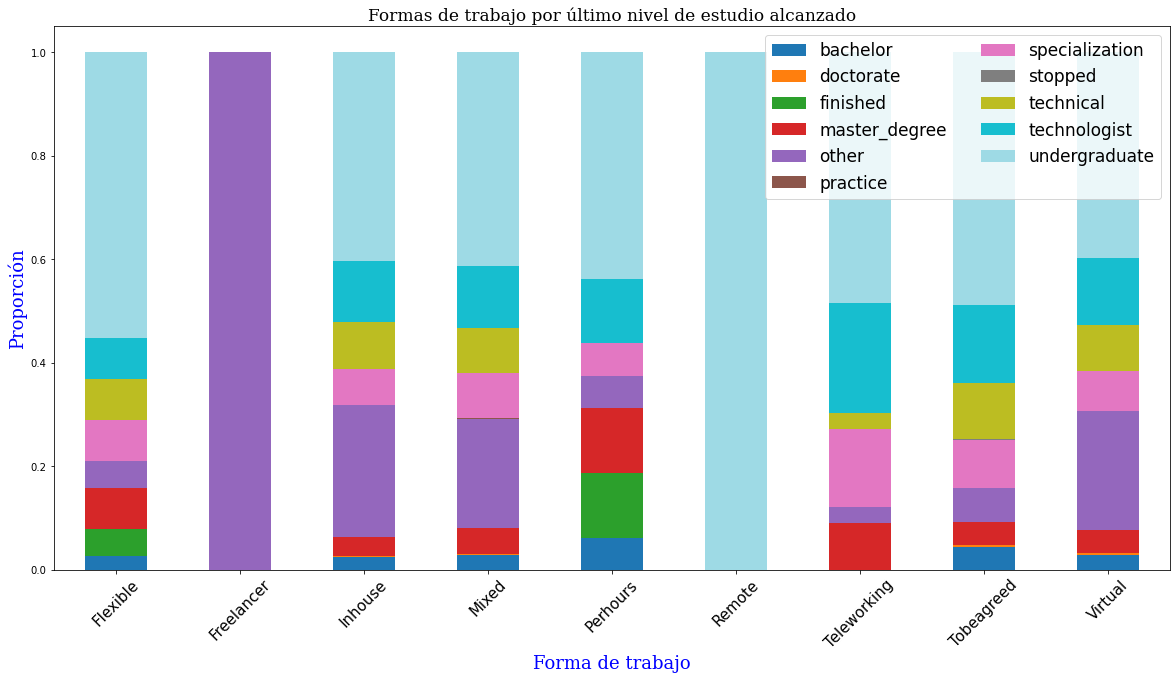

In [55]:
tablacruzada.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20',
                    figsize=(20, 10))

plt.legend(loc="upper right", ncol=2, fontsize="17")
plt.xlabel("Forma de trabajo",fontdict={"family":"serif","color":"blue","size":18,"style":"normal"})
plt.ylabel("Proporción",fontdict={"family":"serif","color":"blue","size":18,"style":"normal"})
plt.xticks(rotation=45, fontsize=15)
plt.title("Formas de trabajo por último nivel de estudio alcanzado",loc="center",
          fontdict={"family":"serif","color":"black","size":17,"style":"normal"})
plt.show()

<FONT FACE="cambria" SIZE=5 COLOR="red"> 
    2. Scatter plot of age vs. average_feedback.
    <FONT

In [56]:
sns.set_style("darkgrid")

Para la realización de este gráfico debemos construir a variable edad utilizando la fecha de cumpleaños:

In [57]:
def edad(cumple):
    hoy = date.today()
    hoy = pd.to_datetime(hoy, format='%Y-%m-%d')
    return hoy.year-cumple.dt.year

In [58]:
df3["edad"]=edad(df2["birthdate"])

<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Gráfico de dispersión edad versus media de feedback.
    <FONT

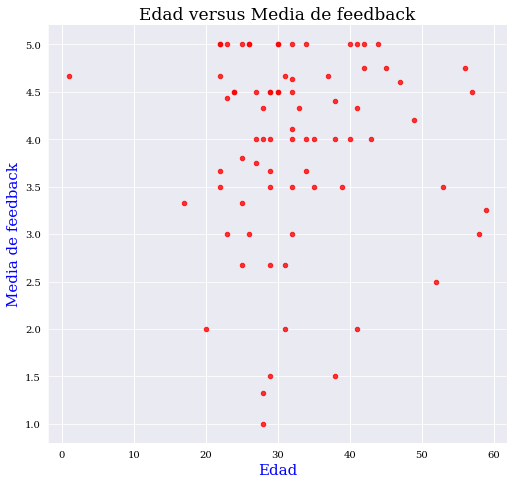

In [59]:
fig = sns.lmplot(x="edad",y="average_feedback",data=df3,markers="o",scatter_kws={"color":"red","s":20},fit_reg=False,
       ci=None,legend=False,truncate=False,height=6.5,aspect=1.1)

plt.xticks(color="black",family="serif",size=10,style="normal")
plt.yticks(color="black",family="serif",size=10,style="normal")
plt.xlabel("Edad",fontdict={"family":"serif","color":"blue","size":15,"style":"normal"})
plt.ylabel("Media de feedback",fontdict={"family":"serif","color":"blue","size":15,"style":"normal"})
plt.title("Edad versus Media de feedback",loc="center",
          fontdict={"family":"serif","color":"black","size":17,"style":"normal"})
plt.grid(axis="x",color="white",ls="-",lw=1)
plt.show(fig)

<FONT FACE="cambria" SIZE=5 COLOR="red"> 
    3. Line plot of profile_completed over time (by day, by week, etc.).
    <FONT

Se retiran las horas del formato de la columna

In [60]:
df4=df2

In [61]:
df4["created_at"]=df4.created_at.dt.date

fecha mínima y máxima:

In [62]:
ps.sqldf("""select min(created_at), max(created_at) from df4""")

,min(created_at),max(created_at)
0,2016-01-07,2023-04-17


Se procesa la información para poder llenar los datos de fechas faltantes con '0':

In [63]:
df4.index = pd.DatetimeIndex(df4['created_at']).floor('D')

In [64]:
fechas=df4.resample('D').sum()
fechas=fechas.fillna(0)
fechas=fechas.reset_index()
fechas=fechas.iloc[:,[0,3]]

In [65]:
fechas.head()

,created_at,Completo
0,2016-01-07,1
1,2016-01-08,0
2,2016-01-09,0
3,2016-01-10,0
4,2016-01-11,0


<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Gráfico de perfiles completados a través del tiempo (días).
    <FONT

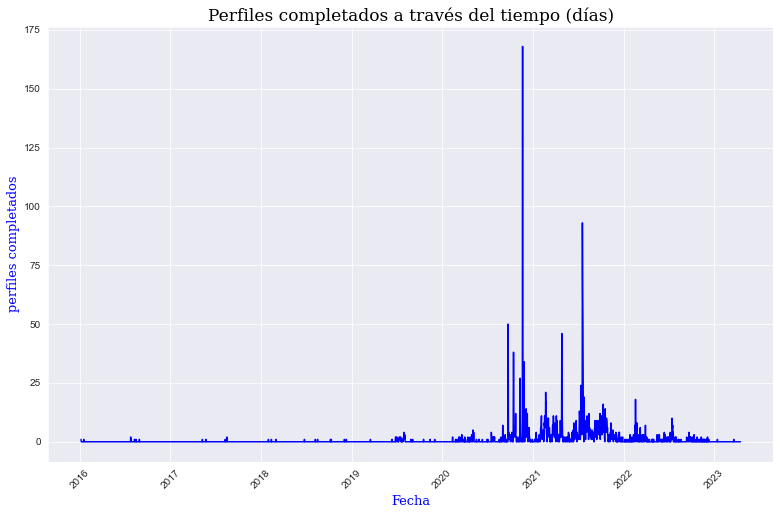

In [66]:
x=fechas["created_at"]
y=fechas["Completo"]
plt.rcParams['figure.figsize'] = [13, 8]
fig = sns.lineplot(x="created_at",y="Completo",data=fechas,dashes=False,color="b")
plt.xlabel('Fecha',fontdict={"family":"serif","color":"blue","size":13,"style":"normal"})
plt.ylabel('perfiles completados',fontdict={"family":"serif","color":"blue","size":13,"style":"normal"})
plt.xticks(rotation=45, fontsize=10)
plt.title("Perfiles completados a través del tiempo (días)",loc="center",
          fontdict={"family":"serif","color":"black","size":17,"style":"normal"})
plt.show(fig)


In [67]:
fechas2=df4.resample('M').sum()
fechas2=fechas2.reset_index()

<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Gráfico de perfiles completados a través del tiempo (meses).
    <FONT

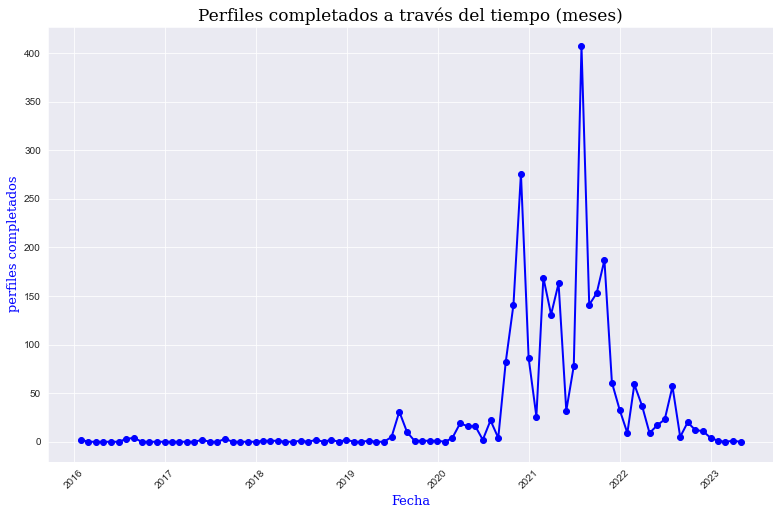

In [68]:
x=fechas2["created_at"]
y=fechas2["Completo"]
plt.rcParams['figure.figsize'] = [13, 8]
plt.plot(x,y,color="b",marker="o",linewidth=2)
plt.xlabel('Fecha',fontdict={"family":"serif","color":"blue","size":13,"style":"normal"})
plt.ylabel('perfiles completados',fontdict={"family":"serif","color":"blue","size":13,"style":"normal"})
plt.xticks(rotation=45, fontsize=10)
plt.title("Perfiles completados a través del tiempo (meses)",loc="center",
          fontdict={"family":"serif","color":"black","size":17,"style":"normal"})

plt.xticks(rotation=45)
plt.show()

In [69]:
fechas3=df4.resample('Y').sum()
fechas3=fechas3.reset_index()

<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Gráfico de perfiles completados a través del tiempo (años).
    <FONT

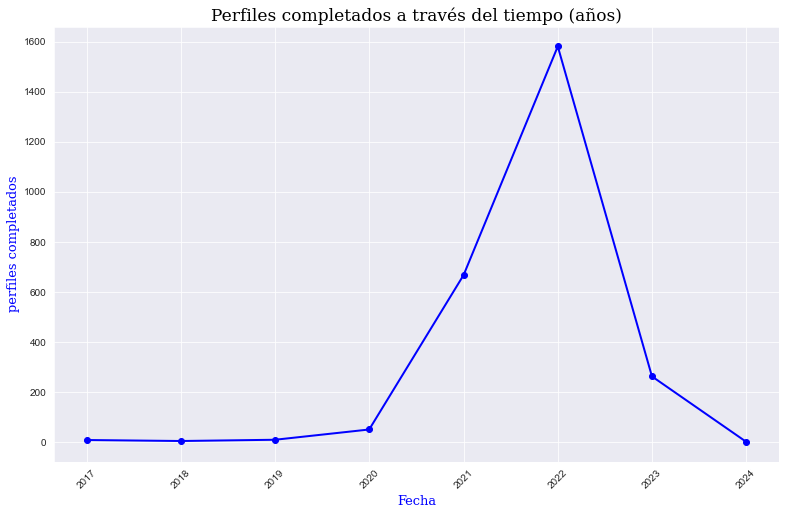

In [70]:
x=fechas3["created_at"]
y=fechas3["Completo"]
plt.rcParams['figure.figsize'] = [13, 8]
plt.plot(x,y,color="b",marker="o",linewidth=2)
plt.xlabel('Fecha',fontdict={"family":"serif","color":"blue","size":13,"style":"normal"})
plt.ylabel('perfiles completados',fontdict={"family":"serif","color":"blue","size":13,"style":"normal"})
plt.xticks(rotation=45, fontsize=10)
plt.title("Perfiles completados a través del tiempo (años)",loc="center",
          fontdict={"family":"serif","color":"black","size":17,"style":"normal"})


plt.xticks(rotation=45)
plt.show()

<FONT FACE="cambria" SIZE=5 COLOR="red"> 
    4. Grafico propuesto: Cantidad acumulada de perfiles completados.
    <FONT

Se realiza el cálculo acumulado de perfiles por días

In [71]:
fechas["acumulado"]=fechas['Completo'].cumsum()

<FONT FACE="cambria" SIZE=4 COLOR="green"> 
    Gráfico de perfiles completados acumulados a través del tiempo.
    <FONT

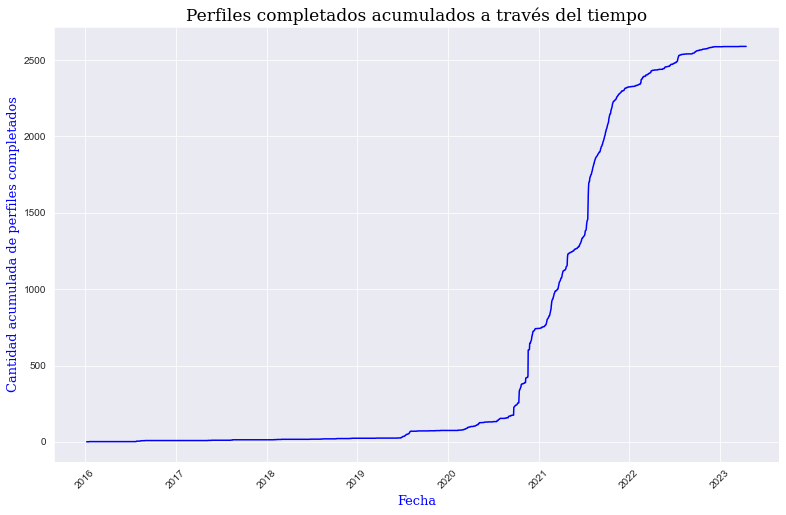

In [72]:
x=fechas["created_at"]
y=fechas["acumulado"]
plt.rcParams['figure.figsize'] = [13, 8]
plt.plot(x,y,color="b")
plt.xlabel('Fecha',fontdict={"family":"serif","color":"blue","size":13,"style":"normal"})
plt.ylabel('Cantidad acumulada de perfiles completados',fontdict={"family":"serif","color":"blue","size":13,"style":"normal"})
plt.xticks(rotation=45, fontsize=10)
plt.title("Perfiles completados acumulados a través del tiempo",loc="center",
          fontdict={"family":"serif","color":"black","size":17,"style":"normal"})

plt.xticks(rotation=45)
plt.show()

**Conclusión:** Se concluye que el año del 2021 fue en el que se presentó mayor crecimiento en los perfiles completados, se recomienda analizar el motivo para reproducir en los siguientes años.